<a href="https://colab.research.google.com/github/roshank1605A04/Loan-Prediction/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries** 


In [0]:
import numpy as np
import pandas as pd
import random
from itertools import permutations

import matplotlib.pyplot as plt

**Importing the dataset**

In [0]:
train = pd.read_csv('drive/My Drive/Projects/loan prediction/train_loan.csv')
test = pd.read_csv('drive/My Drive/Projects/loan prediction/test_loan.csv')

print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [0]:
# making copies of train and test
# use only if required

train = train.copy()
test = test.copy()

In [0]:
# visualizing the training dataset

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
# viewing the different columns in training and test sets

print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [0]:
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
test.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [0]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Data Analytics**

In [0]:
# combining the train and test set

# making a 'Loan_Status' column in test set with NaN values
test['Loan_Status'] = 0

# combining train and test datasets
combi = pd.concat([train, test])

# checking the shape of the combined dataset
print(combi.shape)

(981, 13)


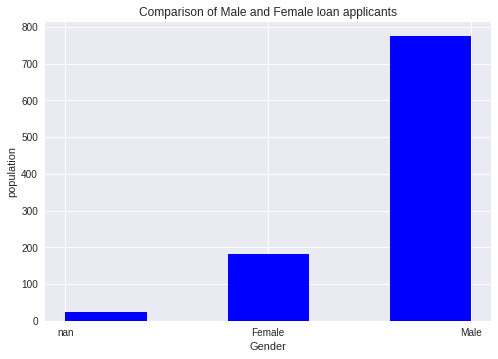

In [0]:
# Univariate Data Analysis
# comparing the gender who applied for the loan

plt.hist(combi['Gender'], bins = 5, color = 'blue')
plt.title('Comparison of Male and Female loan applicants')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

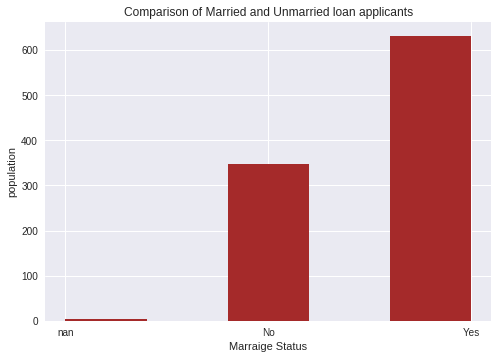

In [0]:
# comparing the Marriage status who applied for the loan

plt.hist(combi['Married'], bins = 5, color = 'brown')
plt.title('Comparison of Married and Unmarried loan applicants')
plt.xlabel('Marraige Status')
plt.ylabel('population')
plt.show()

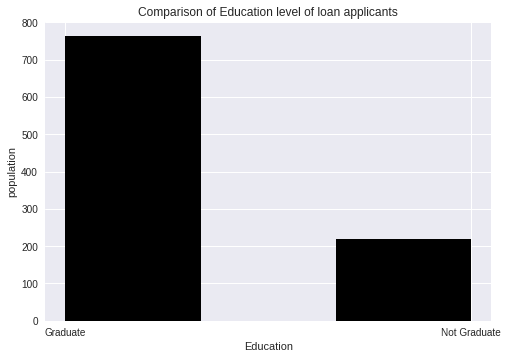

In [0]:
# comparing the Education of applicants who applied for the loan

plt.hist(combi['Education'], bins = 3, color = 'black')
plt.title('Comparison of Education level of loan applicants')
plt.xlabel('Education')
plt.ylabel('population')
plt.show()

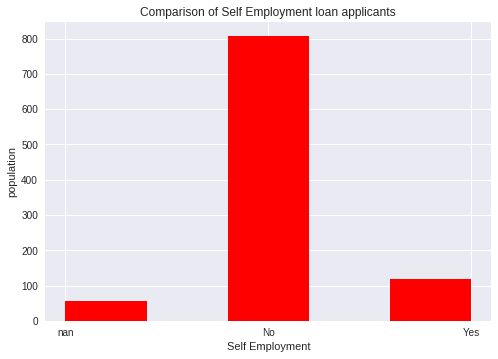

In [0]:
# comparing the Employment status who applied for the loan

plt.hist(combi['Self_Employed'], bins = 5, color = 'red')
plt.title('Comparison of Self Employment loan applicants')
plt.xlabel('Self Employment')
plt.ylabel('population')
plt.show()

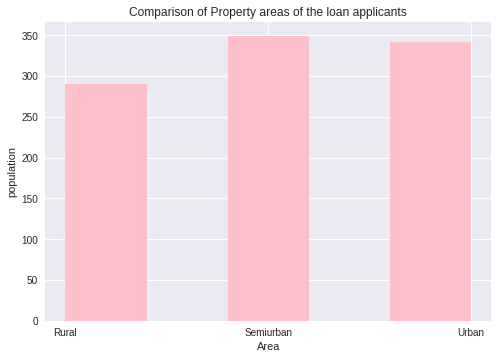

In [0]:
# comparing the Area who applied for the loan

plt.hist(combi['Property_Area'], bins = 5, color = 'pink')
plt.title('Comparison of Property areas of the loan applicants')
plt.xlabel('Area')
plt.ylabel('population')
plt.show()

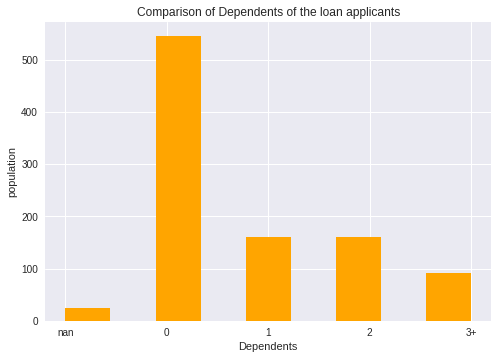

In [0]:
# comparing the Dependants who applied for the loan

plt.hist(combi['Dependents'], bins = 9, color = 'orange')
plt.title('Comparison of Dependents of the loan applicants')
plt.xlabel('Dependents')
plt.ylabel('population')
plt.show()

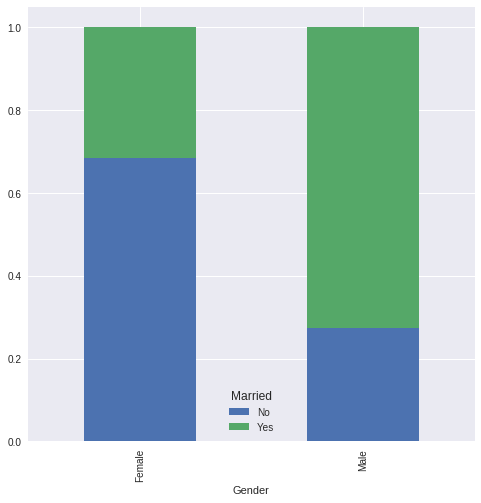

In [0]:
# Bivariate Data Analysis
# comparison of gender vs marriage status


Gender = pd.crosstab(combi['Gender'], combi['Married'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

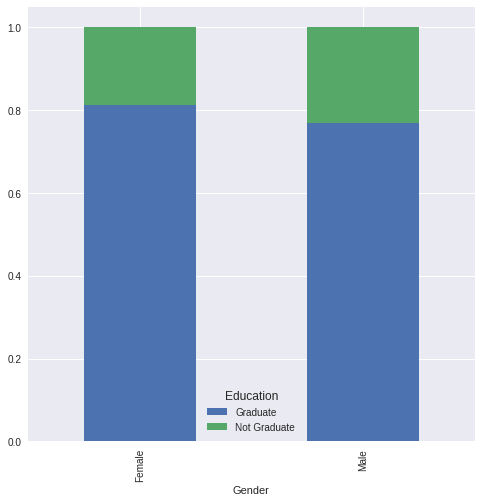

In [0]:
# comparison of gender vs education level


Gender = pd.crosstab(combi['Gender'], combi['Education'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

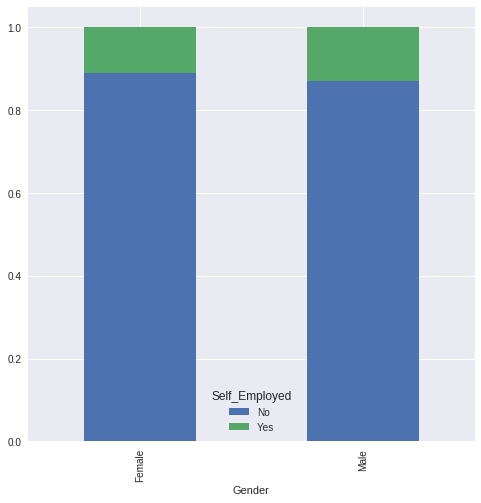

In [0]:
# comparison of gender vs self Employment


Gender = pd.crosstab(combi['Gender'], combi['Self_Employed'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

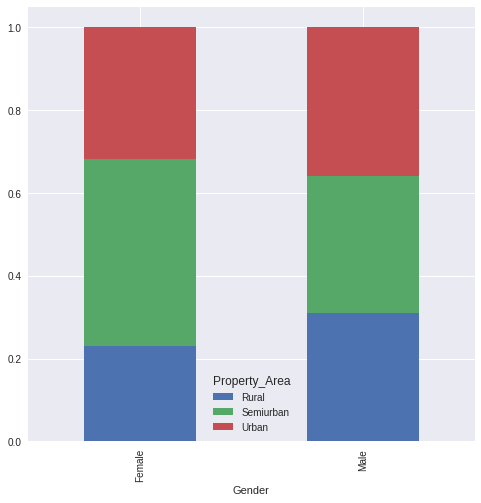

In [0]:
# comparison of gender vs property area


Gender = pd.crosstab(combi['Gender'], combi['Property_Area'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

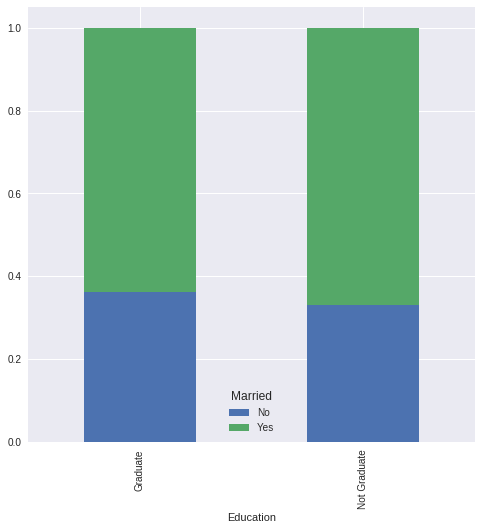

In [0]:
# comparison of Education vs marriage status


Education = pd.crosstab(combi['Education'], combi['Married'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

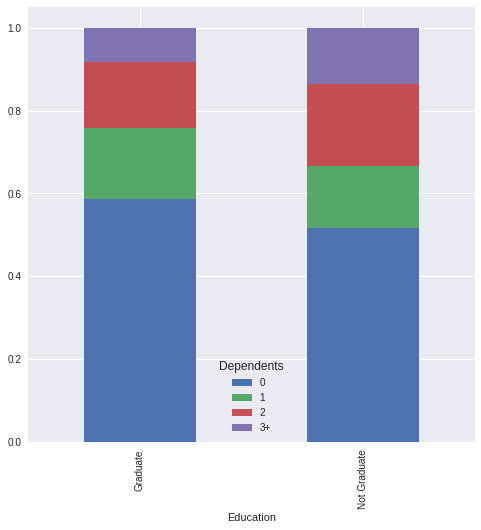

In [0]:
# comparison of Education vs Dependants


Education = pd.crosstab(combi['Education'], combi['Dependents'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

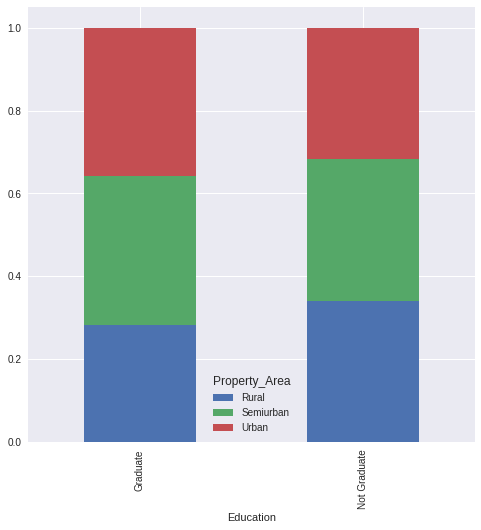

In [0]:
# comparison of Education vs property area


Education = pd.crosstab(combi['Education'], combi['Property_Area'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

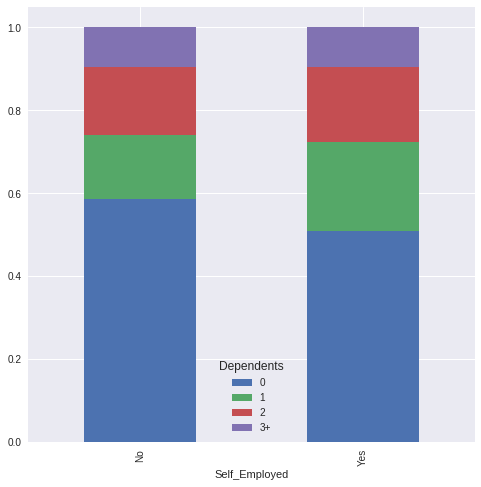

In [0]:
# comparison of Self employment vs dependency


Self_Employed = pd.crosstab(combi['Self_Employed'], combi['Dependents'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

**Data Preprocessing**

In [0]:
# Imputing the missing values in train dataset

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)


train.isnull().any()


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
# Imputing the missing values in test dataset

test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Married'].fillna(train['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)


train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
# Removing unnecassary columns

train = train.drop(columns = 'Loan_ID')
test = test.drop(columns = 'Loan_ID')

print(train.shape)
print(test.shape)


In [0]:
# optional
# splitting combi again into train and test

#train = combi.iloc[:614,:]
#test = combi.iloc[614:,:]
#test = test.drop(columns = 'Loan_Status')

#print(train.shape)
#print(test.shape)

In [0]:
# splitting the training set into x(independent) and y(independent) variables

#x_train = train.iloc[:,:-1]
#y_train = train.iloc[:,11]
#x_test = test.iloc[:,:]

x = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

print(x.shape)
print(y.shape)
#print(y_train)

(614, 11)
(614,)


In [0]:
# converting categorical variables into numerical values
# One Hot Encoding

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(x.shape)

(614, 20)
(429, 20)
(185, 20)


In [0]:
# splitting x and y

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 20)
(429,)
(185, 20)
(185,)


**Modelling**

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.8065268065268065
Testing Accuracy : 0.8324324324324325


**Support Vector Machine**

In [0]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 1.0
Testing Accuracy : 0.7297297297297297


**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7081081081081081


**Random Forset**

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.9836829836829837
Testing Accuracy : 0.7837837837837838


**Multi Layer Perceptron**

In [0]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6666666666666666
Testing Accuracy : 0.7189189189189189
